<h1 align = "center"> Devoir <h1>
<h3 align = "center"> Réalisé par : El ghalbzouri Akram <h3>
<h3 align = "center"> Master : MIDC <h3>

# Introduction

Cette étude se concentre sur l'exploration d'un échantillon d'étudiants à travers la collecte de données, incluant des informations telles que le genre, le nombre d'heures d'études, et les scores obtenus. Les objectifs de cette analyse sont multiples : identifier le type des variables présentes, conduire une analyse univariée pour examiner la distribution de chaque variable, explorer les relations entre deux variables via une ou plusieurs analyses bivariées, et enfin, réaliser des analyses multivariées pour examiner les relations simultanées entre plusieurs variables. Notre approche vise à mieux comprendre les tendances et les interactions au sein de cet échantillon d'étudiants.

# Importation des données

Premièrement, on commence par l'importation de fichier qui contient les données des étudiants.

In [143]:
# On lire le fichier excel:
library(readxl)
data <- as.data.frame(read_excel("data/data_etudiants.xlsx"))
head(data)

,Individu,Genre,HeuresEtud,Score
,<dbl>,<dbl>,<chr>,<dbl>
1,1,1,6,53
2,2,2,7,60
3,3,1,6.5,56
4,4,2,8,79
5,5,1,6.6,58
6,6,1,8.1,85


On va corrige les types de notre données et on enlève la colonne d'individu.

In [144]:
# charger la librairie dplyr
library(dplyr)

# On enlève la colonne d'individu
data <- data[, -1]

# On corrige les types de données
data <- mutate(data,
  Genre = factor(Genre),
  HeuresEtud = as.double(HeuresEtud)
)

On voir les données maintenant

In [145]:
head(data)

,Genre,HeuresEtud,Score
,<fct>,<dbl>,<dbl>
1,1,6.0,53
2,2,7.0,60
3,1,6.5,56
4,2,8.0,79
5,1,6.6,58
6,1,8.1,85


# Types des  variables :

Avant d'approfondir notre analyse, commençons par définir les types de variables présentes dans notre étude.

  - **Genre** : variable qualitative nominale.
  - **HeuresEtude** : variable quantitative continue.
  - **Score** : variable quantitative discrète. 

# Analyse uni-variée  

Pour l'analyse univariée, nous focaliserons notre attention sur la variable "Score". Cette démarche implique l'examen de la tendance centrale, illustrée par des mesures telles que la moyenne, la médiane, et le mode, ainsi que l'évaluation de la dispersion des données.

## La tendance central :

In [146]:

mean <- mean(data$Score)
# Calculer la fréquence
freq_table <- table(data$Score)
modes <- as.numeric(names(freq_table[freq_table == max(freq_table)]))
median <- median(data$Score)

# Affichage des résultats avec print
print(paste("Moyenne :", mean))
print(paste("Modes :", toString(modes)))
print(paste("Médiane :", median))


[1] "Moyenne : 71.1904761904762"
[1] "Modes : 56, 65, 76, 79"
[1] "Médiane : 72"


**Interprétation :**

Les données semblent avoir une distribution multimodale avec plusieurs modes (56, 65, 76, 79), et la moyenne (71.19) est légèrement inférieure à la médiane (72), ce qui peut indiquer une légère asymétrie vers la gauche dans la distribution des scores. Cela peut être exploré plus en détail en examinant un histogramme ou un graphique de densité pour mieux comprendre la distribution.

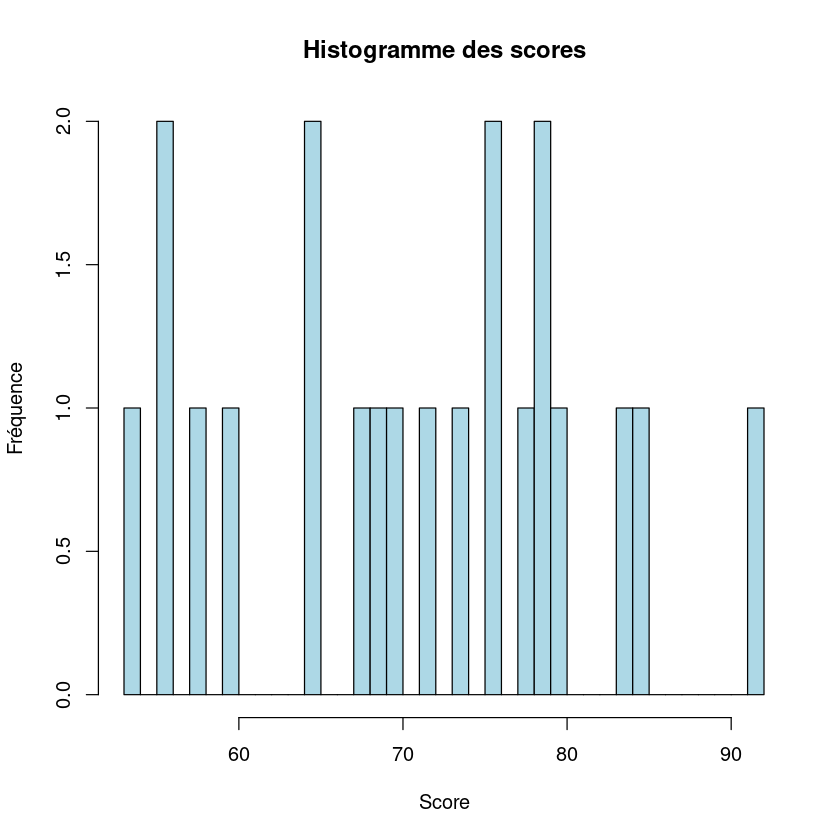

In [147]:
hist(data$Score,
  main = "Histogramme des scores",
  xlab = "Score",
  ylab = "Fréquence",
  col = "lightblue",
  border = "black",
  breaks = 30
)


Ici on confirme les résultats.

## Dispersion des données

In [148]:

variance <- var(data$Score)
sd <- sd(data$Score)

# Affichage des résultats avec print
print(paste("Variance :", variance))
print(paste("Écart-type :", sd))


[1] "Variance : 113.661904761905"
[1] "Écart-type : 10.6612337354504"


**Interprétation :**

L'écart-type de 10.66 suggère que les scores individuels tendent à dévier d'environ 10.66 points de la moyenne. Cela renforce l'idée que les scores ne sont pas tous regroupés étroitement autour de la moyenne, mais plutôt répartis sur une certaine plage.

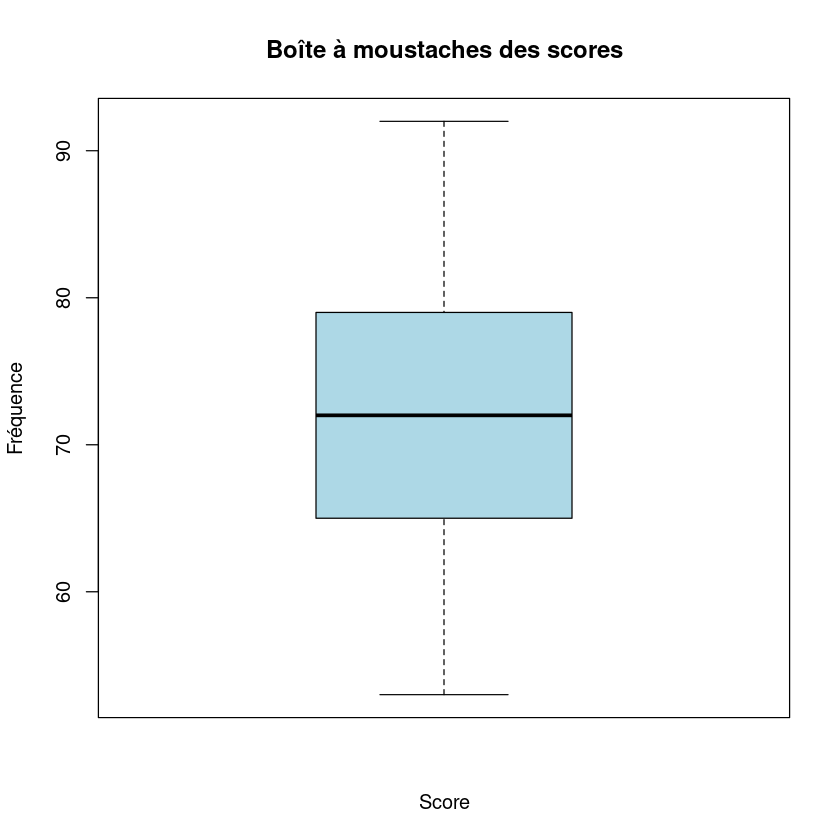

In [149]:
boxplot(data$Score,
  main = "Boîte à moustaches des scores",
  xlab = "Score",
  ylab = "Fréquence",
  col = "lightblue",
  border = "black"
)

Ici on confirme les résultats précédant, et on voit clairement que les scores varient d'une manière grande.

Après effectuer l'analyse uni-variée, on va commencer l'analyse bi-variée.

# Analyse bi-variée

Pour effectuer l'analyse bi-variée, on va effectuer une analyse entre les variables score et heuresEtud, alors on va effectuer un régression linéaire

## Régression linéaire entre les variables quantitative score et heuresEtude

On faire un nuage des points pour voir est ce qu'il ya une relation linéaire entre les variables.

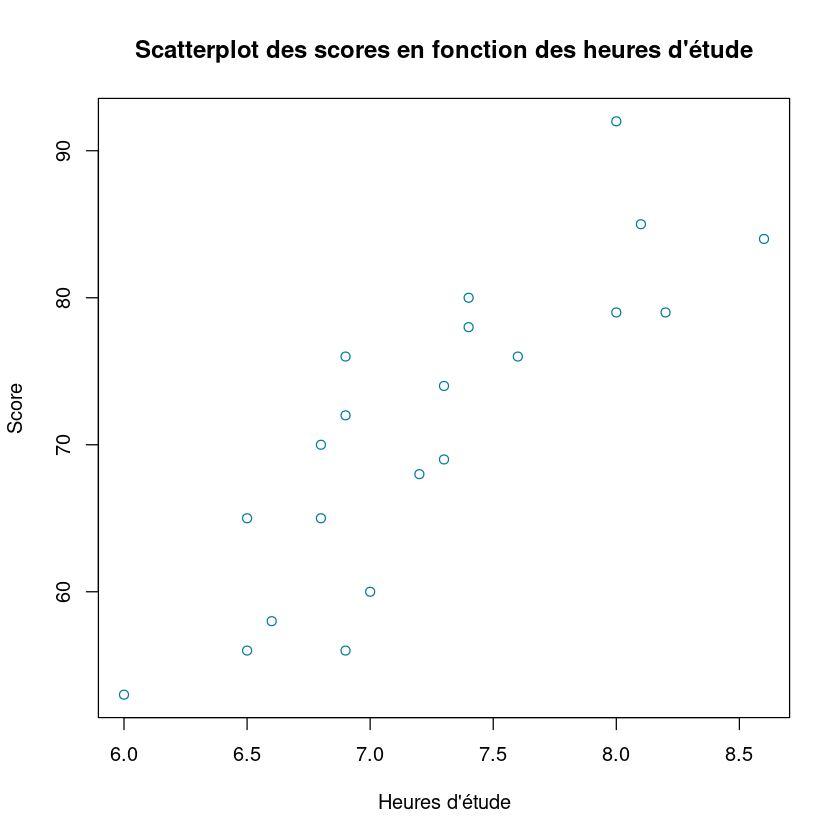

In [150]:
plot(data$HeuresEtud, data$Score,
  main = "Scatterplot des scores en fonction des heures d'étude",
  xlab = "Heures d'étude",
  ylab = "Score",
  col = "#007ba3"
)

On voit qu'on peut avoir une relation lineaire.

### Test de corrélation

In [151]:
cor.test(data$HeuresEtud, data$Score)


	Pearson's product-moment correlation

data:  data$HeuresEtud and data$Score
t = 6.9255, df = 19, p-value = 1.331e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6533236 0.9360326
sample estimates:
      cor 
0.8463214 


On voit qu'il ya une forte corrélation positive entre les deux variables.

Et maintenant on construit le modèle

In [152]:
modele <- lm(Score ~ HeuresEtud, data = data)
summary(modele)


Call:
lm(formula = Score ~ HeuresEtud, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5624  -4.4558  -0.1936   4.5933  10.3801 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -27.889     14.363  -1.942   0.0671 .  
HeuresEtud    13.689      1.977   6.926 1.33e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.826 on 19 degrees of freedom
Multiple R-squared:  0.7163,	Adjusted R-squared:  0.7013 
F-statistic: 47.96 on 1 and 19 DF,  p-value: 1.331e-06


**Interprétation** : 

La variable "HeuresEtud" est significativement associée au score, et le modèle de régression linéaire semble bien s'ajuster aux données, expliquant environ 71.63% de la variabilité dans le score.

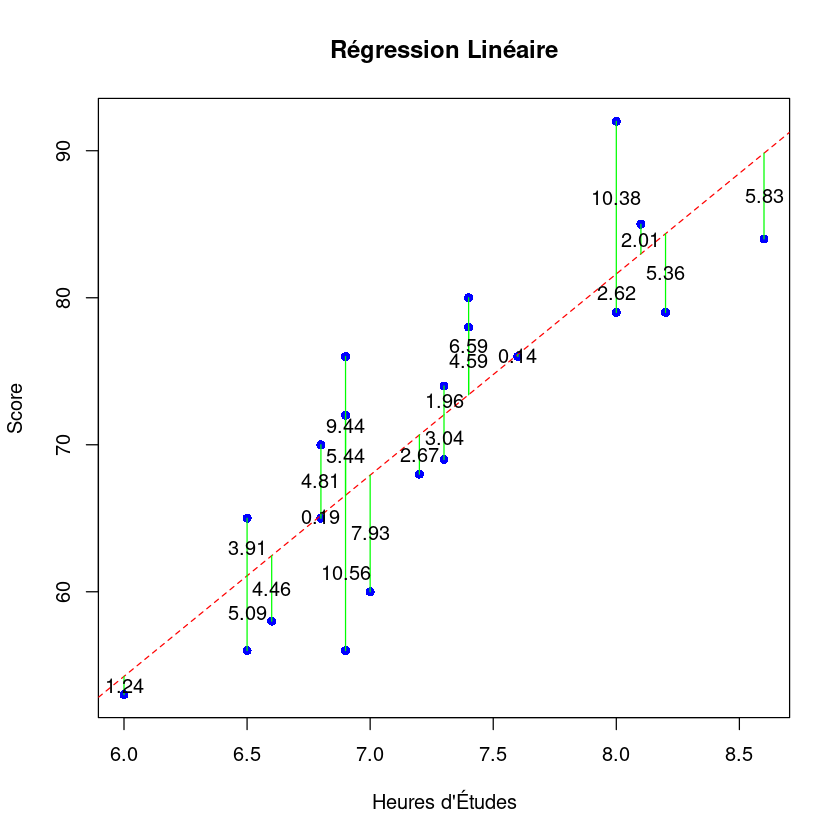

In [153]:
# Créer le graphique de dispersion
plot(data$HeuresEtud, data$Score, main = "Régression Linéaire", 
     xlab = "Heures d'Études", ylab = "Score", pch = 16, col = "blue")

# Ajouter la ligne de régression
abline(modele, col = "red", lty = 2)

# Ajouter les erreurs
predictions <- predict(modele)
segments(data$HeuresEtud, data$Score, data$HeuresEtud, predictions, col = "green", lty = 1)

# Ajouter des étiquettes pour les erreurs
for (i in 1:nrow(data)) {
  text(data$HeuresEtud[i], (data$Score[i] + predictions[i]) / 2,
       sprintf("%.2f", abs(data$Score[i] - predictions[i])), col = "black")
}


### Test de normalité des résidus

In [154]:
shapiro.test(residuals(modele))


	Shapiro-Wilk normality test

data:  residuals(modele)
W = 0.97903, p-value = 0.9108


Une valeur $p_{value} < 0.05$ indique qu'on accepte $H_0$ et que les résidus suivent un li normal. 

### Test d’homogénité des résidus    

In [155]:
# install.packages("lmtest")
library(lmtest)

# Assuming 'model' is your linear regression model
# Replace 'model' with the actual name of your model
bptest(modele)


	studentized Breusch-Pagan test

data:  modele
BP = 0.080085, df = 1, p-value = 0.7772


# Analyse multi-variée  

Pour faire l'analyse multi-variée, on va transformer la variable heuresEtude a une variable qualitative de la manière : 
  - class 1 : Heures etudes entre 0 et 6.9 .
  - class 2 : Heures etudes entre 6.9 et 7.5 .
  - class 3 : Heures etudes plus que 7.5 .

Maintenant on va faire une ANOVA2 (ANOVA a 2 facteurs) sur ces variables

Transformation des données : 

In [156]:
data <- data %>%
  mutate(
    # Genre = factor(Genre),
    HeuresEtud = cut(HeuresEtud,
      breaks = c(0, 6.9, 7.5, max(HeuresEtud, na.rm = TRUE)),
      labels = c(1, 2, 3), include.lowest = TRUE
    )
  )

Maintenant on voir les boxplot : 

Genre,HeuresEtud,variable,n,mean,sd
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,Score,5,58.60,6.618
1,2,Score,2,74.00,8.485
1,3,Score,4,83.00,7.071
2,1,Score,4,69.50,5.447
2,2,Score,4,70.25,7.762
2,3,Score,2,81.50,3.536


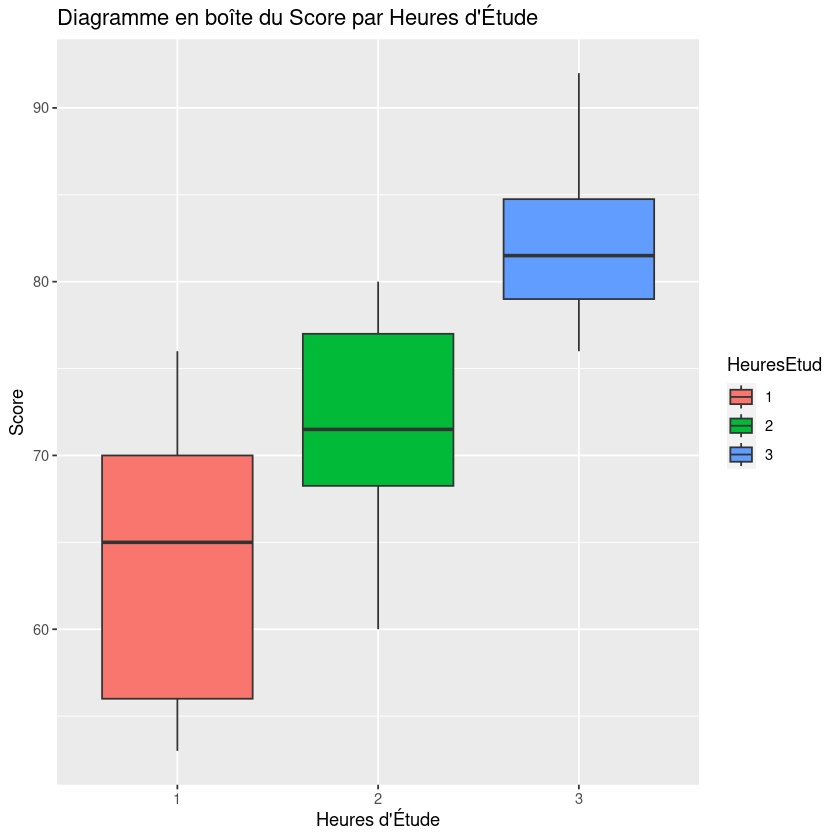

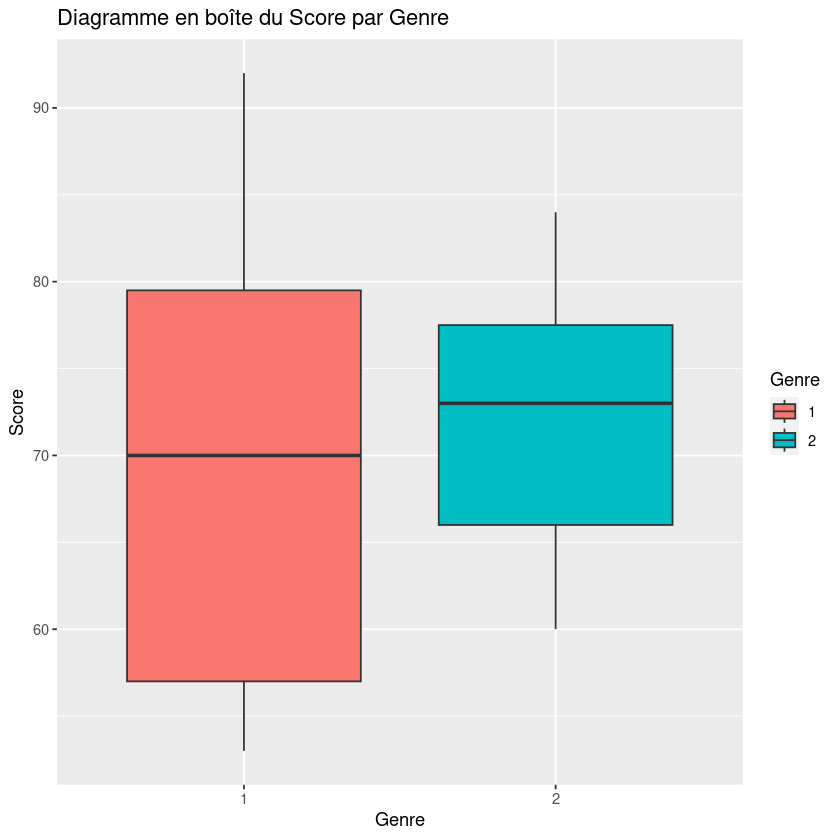

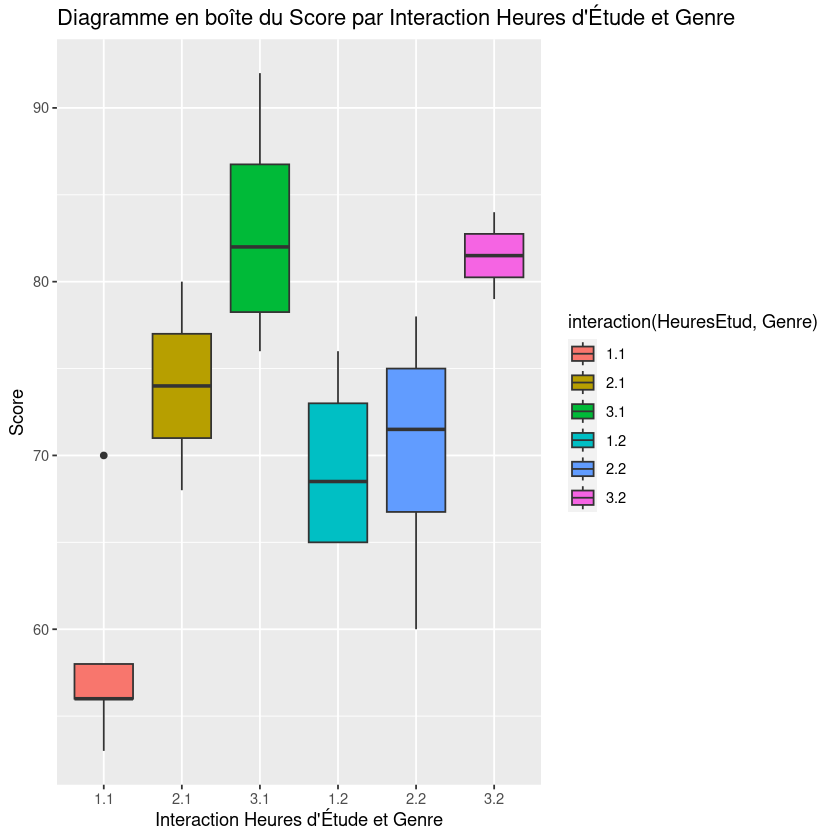

In [166]:
library(ggpubr)
library(ggplot2)

data %>% group_by(Genre, HeuresEtud) %>% get_summary_stats(Score, type = "mean_sd")

ggplot(data, aes(x = HeuresEtud, y = Score, fill = HeuresEtud)) +
  geom_boxplot() +
  labs(x = "Heures d'Étude", y = "Score") +
  ggtitle("Diagramme en boîte du Score par Heures d'Étude")

ggplot(data, aes(x = Genre, y = Score, fill = Genre)) +
  geom_boxplot() +
  labs(x = "Genre", y = "Score") +
  ggtitle("Diagramme en boîte du Score par Genre")

# Assuming data is your dataset
# If your dataset does not have a variable named 'Genre', replace it with the actual variable name

# Create a boxplot for the interaction of 'HeuresEtud' and 'Genre'
ggplot(data, aes(x = interaction(HeuresEtud, Genre), y = Score, fill = interaction(HeuresEtud, Genre))) +
  geom_boxplot() +
  labs(x = "Interaction Heures d'Étude et Genre", y = "Score") +
  ggtitle("Diagramme en boîte du Score par Interaction Heures d'Étude et Genre")


D'apres ces figures on peut voir que les heures d'etudes peut avoir un effet sur le score.

Maintenant on faire l'anova : 

In [176]:
# on faire l'anova
rs.aov <- aov(
  Score ~ HeuresEtud + Genre + interaction(HeuresEtud, Genre),
  data = data
)
summary(rs.aov)

                               Df Sum Sq Mean Sq F value   Pr(>F)    
HeuresEtud                      2 1308.0   654.0  14.438 0.000319 ***
Genre                           1   60.7    60.7   1.339 0.265242    
interaction(HeuresEtud, Genre)  2  225.1   112.6   2.485 0.116930    
Residuals                      15  679.5    45.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

D’après ces resultats on voit que seul la variable HeureEtud est significatif, donc elle a un effet sur le score.

Le test de tukey : 

In [188]:
library(rstatix)
rs.ght <- data %>% games_howell_test(Score ~ HeuresEtud)
rs.ght
rs.ght2 <- rs.ght %>% add_xy_position(x = "HeuresEtud")

,.y.,group1,group2,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Score,1,2,8.055556,-2.7917691,18.90288,0.158000,ns
2,Score,1,3,19.055556,9.5794298,28.53168,0.000394,***
3,Score,2,3,11.000000,0.4356844,21.56432,0.042000,*


D'apres le test de Tukey en constate que la class 3 a le plus effet sur le score.